In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_cleaned = pd.read_csv('df_cleaned.csv')

In [2]:
df_cleaned.head()

,pais,ano,status,expectativa_vida,mortalidade_adulta,mortes_infanis,consumo_alcool,pct_despesa_saude_pib,vacina_hep_b_crianca,relato_sarampo,...,vacina_poliomelite_crianca,pct_despesa_saude,vacina_difteria_crianca,morte_HIV_4anos,PIB,populacao,magreza_10_19,magreza_5_9,composicao_recursos_renda,escolaridade
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33753499.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,32716210.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31541209.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,30466479.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,29249157.0,18.2,18.2,0.454,9.5


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [4]:
label_encoder = LabelEncoder()

dic_dev = {"Developing": 1, "Developed": 0}

df_cleaned['status_encoded'] = df_cleaned['status'].map(dic_dev)

In [5]:
df_cleaned2 = df_cleaned.drop(['status'], axis=1)

In [6]:
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.model_selection import train_test_split

# Suponha que o DataFrame tenha uma coluna chamada 'pais'
# Agrupar por países para evitar vazamento
paises = df_cleaned2['pais'].unique()

# Divisão de países em treino e teste (80% treino, 20% teste)
paises_train, paises_test = train_test_split(paises, test_size=0.2, random_state=42)

# Separar os conjuntos com base na divisão dos países
train_mask = df_cleaned2['pais'].isin(paises_train)
test_mask = df_cleaned2['pais'].isin(paises_test)

X_train = X[train_mask]
y_train = y[train_mask]

X_test = X[test_mask]
y_test = y[test_mask]


In [8]:
X_test.pais.unique()

array(['Azerbaijan', 'Bangladesh', 'Barbados', 'Bosnia And Herzegovina',
       'Botswana', 'Bulgaria', 'Cambodia', 'Central African Republic',
       'Chad', 'Chile', 'Croatia', 'Germany', 'Guatemala', 'Ireland',
       'Italy', 'Jamaica', 'Kazakhstan', 'Liberia', 'Malawi', 'Malaysia',
       'Netherlands', 'Papua New Guinea', 'Paraguay', 'Serbia', 'Spain',
       'Sri Lanka', 'Togo', 'Tonga', 'Turkmenistan', 'Uzbekistan'],
      dtype=object)

In [9]:
X_train.pais.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Brazil', 'Brunei Darussalam', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Canada', 'China', 'Colombia', 'Comoros',
       'Costa Rica', 'Cuba', 'Cyprus', 'Djibouti', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Ethiopia', 'Fiji', 'France', 'Gabon', 'Georgia',
       'Ghana', 'Greece', 'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'India', 'Indonesia', 'Iraq', 'Israel',
       'Jordan', 'Kenya', 'Kiribati', 'Kuwait', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar',
       'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'New 

In [10]:
X_train.drop(columns=['pais'], inplace=True)
X_test.drop(columns=['pais'], inplace=True)

___
## Random Forest Regressor
___

### Treino e Validação

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_mse = []
arvores_mae = []
# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    list_fold_mse = []
    list_fold_mae = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
        list_fold_mse.append(fold_mse)
        list_fold_mae.append(fold_mae)

    # Média do MSE nos folds
    mean_mse = np.mean(list_fold_mse)
    mean_mae = np.mean(list_fold_mae)
    # print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    arvores_mse.append(mean_mse)
    arvores_mae.append(mean_mae)



n_estimators = 10
n_estimators = 20
n_estimators = 30
n_estimators = 40
n_estimators = 50
n_estimators = 60
n_estimators = 70
n_estimators = 80
n_estimators = 90
n_estimators = 100


Melhor número de árvores: 100 com MSE: 3.2982
Melhor número de árvores: 100 com MSE: 1.0416


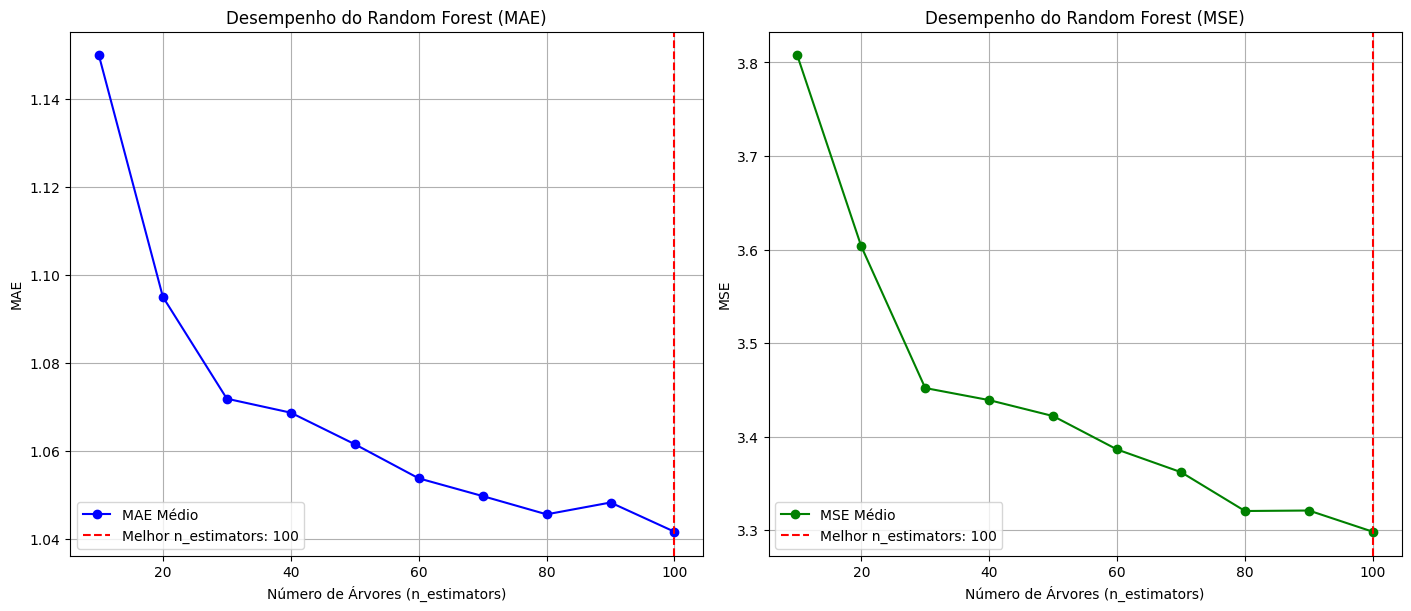

In [12]:
# Identificar o melhor número de árvores
best_n_mse_index = np.argmin(arvores_mse)
best_n_mse = arvores[best_n_mse_index]
print(f"Melhor número de árvores: {best_n_mse} com MSE: {arvores_mse[best_n_mse_index]:.4f}")

# Identificar o melhor número de árvores
best_n_mae_index = np.argmin(arvores_mae)
best_n_mae = arvores[best_n_mae_index]
print(f"Melhor número de árvores: {best_n_mae} com MSE: {arvores_mae[best_n_mae_index]:.4f}")


# Criar subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Gráfico do MAE
axs[0].plot(arvores, arvores_mae, marker='o', linestyle='-', color='b', label='MAE Médio')
axs[0].axvline(x=best_n_mae, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n_mae}')
axs[0].set_xlabel('Número de Árvores (n_estimators)')
axs[0].set_ylabel('MAE')
axs[0].set_title('Desempenho do Random Forest (MAE)')
axs[0].legend()
axs[0].grid()

# Gráfico do MSE
axs[1].plot(arvores, arvores_mse, marker='o', linestyle='-', color='g', label='MSE Médio')
axs[1].axvline(x=best_n_mse, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n_mse}')
axs[1].set_xlabel('Número de Árvores (n_estimators)')
axs[1].set_ylabel('MSE')
axs[1].set_title('Desempenho do Random Forest (MSE)')
axs[1].legend()
axs[1].grid()

# Mostrar o gráfico
plt.show()

### Validação vs Teste

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mse_teste = []  # Armazena MSE do conjunto de teste
mse_validacao = []  # Armazena MSE médio da validação cruzada

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    fold_metrics = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    mse_validacao.append(mean_mse)

    # Avaliação no conjunto de teste
    model_final = RandomForestRegressor(random_state=42, n_estimators=n)
    model_final.fit(X_train, y_train)
    y_test_pred = model_final.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    mse_teste.append(test_mse)


Melhor número de árvores: 100 com MSE de Validação: 3.2982
Melhor número de árvores: 60 com MSE de Teste: 5.4363


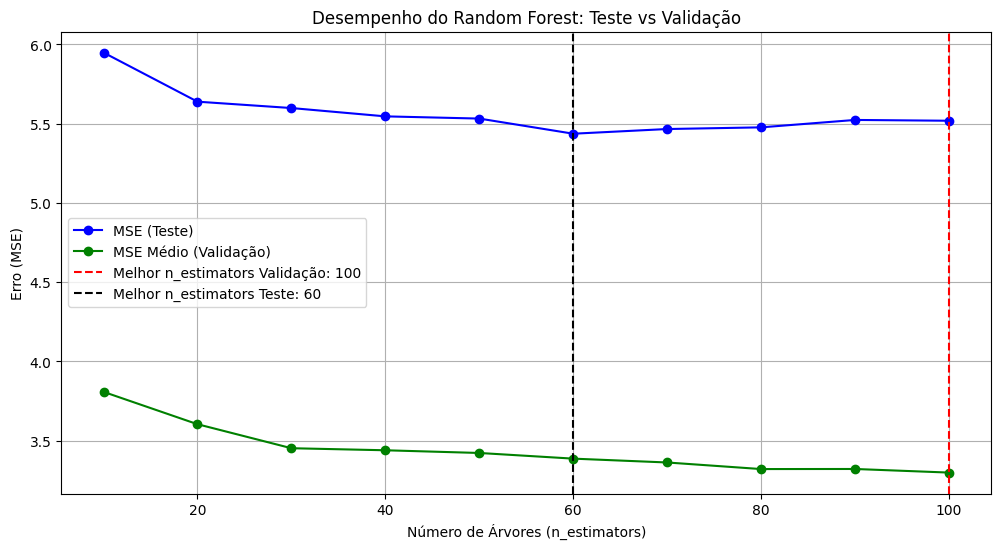

In [14]:

# Identificar o melhor número de árvores
best_n_index = np.argmin(mse_validacao)
best_n_index_teste = np.argmin(mse_teste)
best_n = arvores[best_n_index]
best_n_teste = arvores[best_n_index_teste]
print(f"Melhor número de árvores: {best_n} com MSE de Validação: {mse_validacao[best_n_index]:.4f}")
print(f"Melhor número de árvores: {best_n_teste} com MSE de Teste: {mse_teste[best_n_index_teste]:.4f}")

# Plotando os erros de teste e validação no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(arvores, mse_teste, marker='o', linestyle='-', color='b', label='MSE (Teste)')
plt.plot(arvores, mse_validacao, marker='o', linestyle='-', color='g', label='MSE Médio (Validação)')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators Validação: {best_n}')
plt.axvline(x=best_n_teste, color='k', linestyle='--', label=f'Melhor n_estimators Teste: {best_n_teste}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Erro (MSE)')
plt.title('Desempenho do Random Forest: Teste vs Validação')
plt.legend()
plt.grid()
plt.show()

In [15]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=60)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")
print(f"Teste - MAE: {test_mae:.4f}")


Teste - MSE: 5.4363
Teste - MAE: 1.6839


Text(0.5, 1.0, 'Importância das Features - RandomForestRegressor')

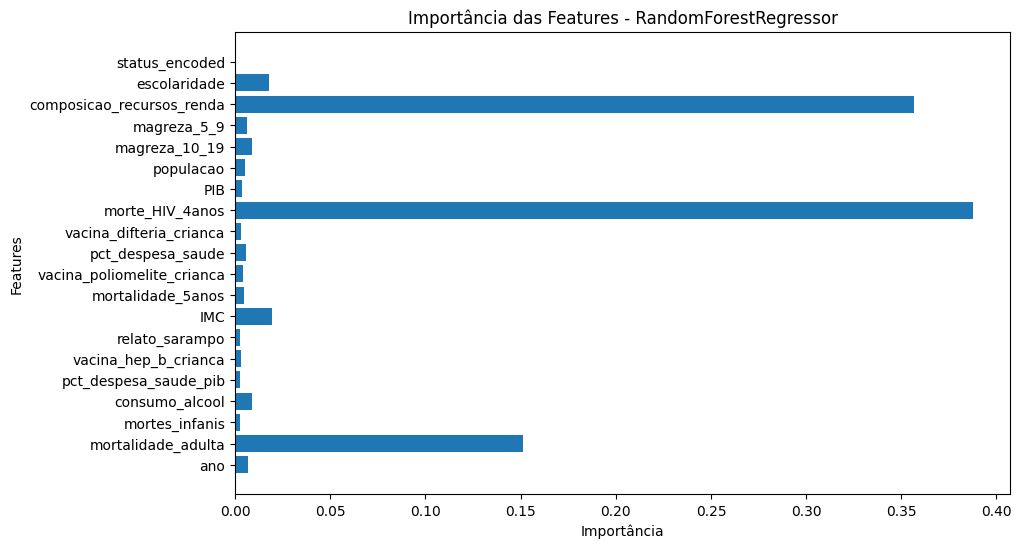

In [16]:
# Importância das features
importances = final_model.feature_importances_

# Criando um gráfico de barras para visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)  # X_train.columns são os nomes das features
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - RandomForestRegressor')

In [ ]:
#plotar a distribuição 

In [40]:
 import pandas as pd
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        # Converte o nome do país em código alpha-2
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        # Obtém o código do continente
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        # Converte o código do continente em nome
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except Exception as e:
        return None  # Retorna None se o país não for encontrado

# Supondo que df_cleaned seja o DataFrame original com a coluna "pais"
# Adicionando a coluna "continente" com base na função
df_cleaned['continente'] = df_cleaned['pais'].apply(country_to_continent)

# Dicionário para complementar informações ausentes ou corrigir países específicos
dic_continente = {
    "Antigua And Barbuda": "North America",
    "Bosnia And Herzegovina": "Europe",
    "Sao Tome And Principe": "Africa",
    "Timor-Leste": "Asia",
    "Trinidad And Tobago": "South America"
}

# Preenchendo valores ausentes ou corrigindo com o dicionário
df_cleaned['continente'] = df_cleaned['continente'].fillna(df_cleaned['pais'].map(dic_continente))

# Exibindo o DataFrame resultante
print(df_cleaned)


             pais   ano      status  expectativa_vida  mortalidade_adulta  \
0     Afghanistan  2015  Developing              65.0               263.0   
1     Afghanistan  2014  Developing              59.9               271.0   
2     Afghanistan  2013  Developing              59.9               268.0   
3     Afghanistan  2012  Developing              59.5               272.0   
4     Afghanistan  2011  Developing              59.2               275.0   
...           ...   ...         ...               ...                 ...   
2325     Zimbabwe  2004  Developing              44.3               723.0   
2326     Zimbabwe  2003  Developing              44.5               715.0   
2327     Zimbabwe  2002  Developing              44.8                73.0   
2328     Zimbabwe  2001  Developing              45.3               686.0   
2329     Zimbabwe  2000  Developing              46.0               665.0   

      mortes_infanis  consumo_alcool  pct_despesa_saude_pib  \
0           

In [42]:
label_encoder = LabelEncoder()

dic_dev = {"Developing": 1, "Developed": 0}

# Aplicar ao DataFrame
df_cleaned['pais_encoded'] = label_encoder.fit_transform(df_cleaned['pais'])
df_cleaned['status_encoded'] = df_cleaned['status'].map(dic_dev)
df_cleaned['continente_encoded'] = label_encoder.fit_transform(df_cleaned['continente'])

In [43]:
df_cleaned2 = df_cleaned.drop(['pais', 'status', "continente"], axis=1)


In [44]:
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_estimators = 10
MSE Médio (Validação Cruzada): 4.2485
MAE Médio (Validação Cruzada): 1.2198
n_estimators = 20
MSE Médio (Validação Cruzada): 3.8072
MAE Médio (Validação Cruzada): 1.1396
n_estimators = 30
MSE Médio (Validação Cruzada): 3.6896
MAE Médio (Validação Cruzada): 1.1100
n_estimators = 40
MSE Médio (Validação Cruzada): 3.6144
MAE Médio (Validação Cruzada): 1.0968
n_estimators = 50
MSE Médio (Validação Cruzada): 3.5844
MAE Médio (Validação Cruzada): 1.0880
n_estimators = 60
MSE Médio (Validação Cruzada): 3.5601
MAE Médio (Validação Cruzada): 1.0842
n_estimators = 70
MSE Médio (Validação Cruzada): 3.5269
MAE Médio (Validação Cruzada): 1.0772
n_estimators = 80
MSE Médio (Validação Cruzada): 3.5136
MAE Médio (Validação Cruzada): 1.0750
n_estimators = 90
MSE Médio (Validação Cruzada): 3.5109
MAE Médio (Validação Cruzada): 1.0747
n_estimators = 100
MSE Médio (Validação Cruzada): 3.5150
MAE Médio (Validação Cruzada): 1.0739
Melhor número de árvores: 90 com MSE: 3.5109


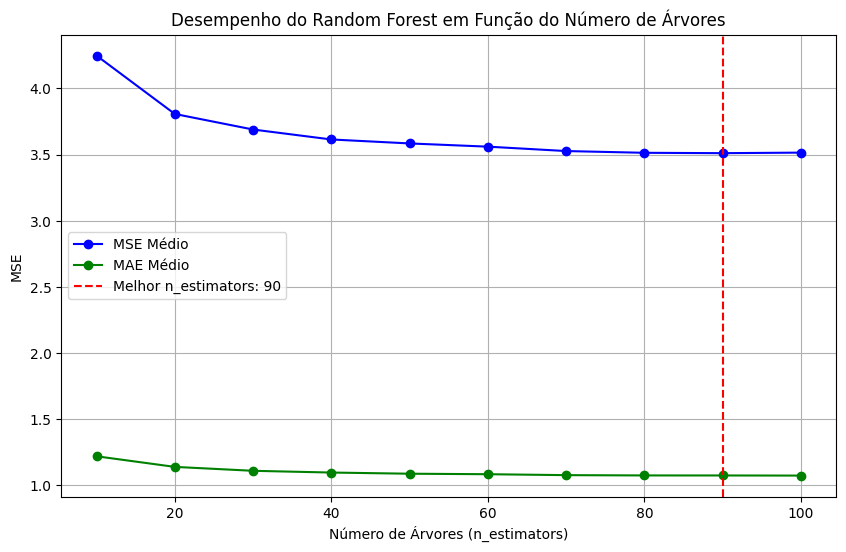

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_acuracias = []
arvores_acuracias_mae = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    fold_metrics = []
    fold_metrics_mae = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_mae = mean_absolute_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)
        fold_metrics_mae.append(fold_mae)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    mean_mae = np.mean(fold_metrics_mae)
    print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    print(f"MAE Médio (Validação Cruzada): {mean_mae:.4f}")
    arvores_acuracias.append(mean_mse)
    arvores_acuracias_mae.append(mean_mae)

# Identificar o melhor número de árvores
best_n_index = np.argmin(arvores_acuracias)
best_n = arvores[best_n_index]
print(f"Melhor número de árvores: {best_n} com MSE: {arvores_acuracias[best_n_index]:.4f}")

# Plotando os erros em função do número de árvores
plt.figure(figsize=(10, 6))
plt.plot(arvores, arvores_acuracias, marker='o', linestyle='-', color='b', label='MSE Médio')
plt.plot(arvores, arvores_acuracias_mae, marker='o', linestyle='-', color='g', label='MAE Médio')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('MSE')
plt.title('Desempenho do Random Forest em Função do Número de Árvores')
plt.legend()
plt.grid()
plt.show()


In [46]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=50)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")


Teste - MSE: 1.7980


Text(0.5, 1.0, 'Importância das Features - RandomForestRegressor')

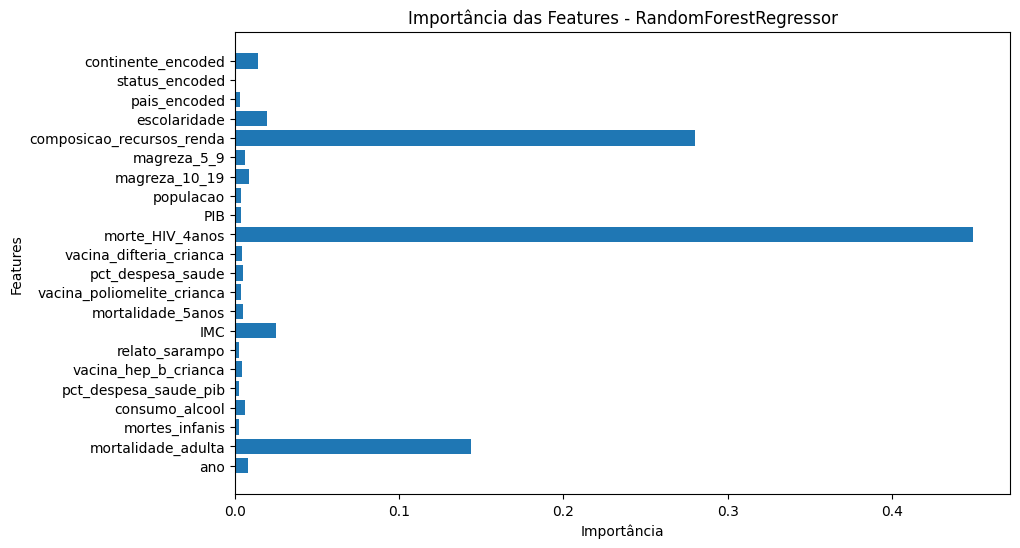

In [47]:
# Importância das features
importances = final_model.feature_importances_

# Criando um gráfico de barras para visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importances)  # X_train.columns são os nomes das features
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features - RandomForestRegressor')

In [ ]:
df_cleaned2 = df_cleaned.drop(['pais', 'status', "morte_HIV_4anos", "composicao_recursos_renda", "mortalidade_adulta"], axis=1)
# Suponha que seu DataFrame se chama df_cleaned2 e a variável alvo é 'target'
X = df_cleaned2.drop(columns=['expectativa_vida'])
y = df_cleaned2['expectativa_vida']

# Divisão inicial: treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_estimators = 10
MSE Médio (Validação Cruzada): 6.6546
n_estimators = 20
MSE Médio (Validação Cruzada): 6.0138
n_estimators = 30
MSE Médio (Validação Cruzada): 5.9194
n_estimators = 40
MSE Médio (Validação Cruzada): 5.8504
n_estimators = 50
MSE Médio (Validação Cruzada): 5.7451
n_estimators = 60
MSE Médio (Validação Cruzada): 5.6904
n_estimators = 70
MSE Médio (Validação Cruzada): 5.6933
n_estimators = 80
MSE Médio (Validação Cruzada): 5.6830
n_estimators = 90
MSE Médio (Validação Cruzada): 5.6683
n_estimators = 100
MSE Médio (Validação Cruzada): 5.6304
Melhor número de árvores: 100 com MSE: 5.6304


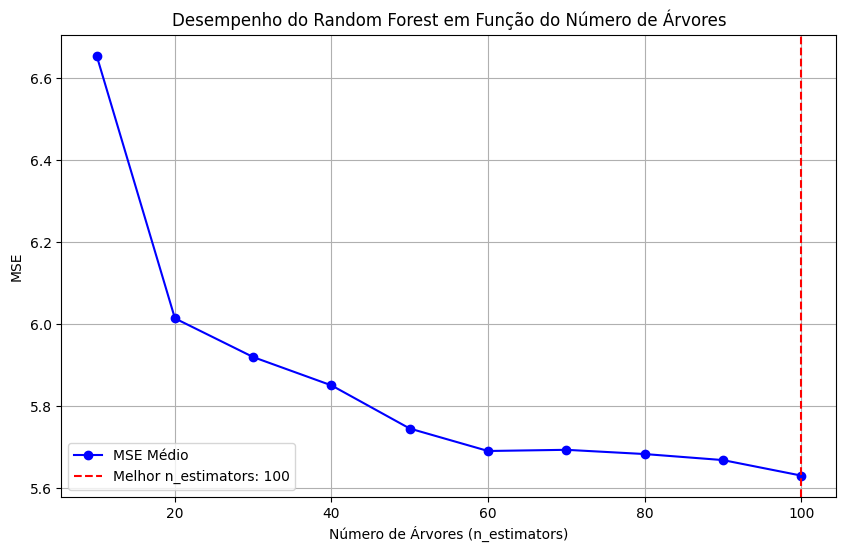

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Lista de números de árvores a testar
arvores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
arvores_acuracias = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for n in arvores:
    print(f"n_estimators = {n}")
    fold_metrics = []
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Random Forest para Regressão
        model = RandomForestRegressor(random_state=42, n_estimators=n)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)

    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")
    arvores_acuracias.append(mean_mse)

# Identificar o melhor número de árvores
best_n_index = np.argmin(arvores_acuracias)
best_n = arvores[best_n_index]
print(f"Melhor número de árvores: {best_n} com MSE: {arvores_acuracias[best_n_index]:.4f}")

# Plotando os erros em função do número de árvores
plt.figure(figsize=(10, 6))
plt.plot(arvores, arvores_acuracias, marker='o', linestyle='-', color='b', label='MSE Médio')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Melhor n_estimators: {best_n}')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('MSE')
plt.title('Desempenho do Random Forest em Função do Número de Árvores')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Ajuste no conjunto de treino completo
final_model = RandomForestRegressor(random_state=42, n_estimators=50)
final_model.fit(X_train, y_train)

# Avaliação no teste
y_test_pred = final_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Teste - MSE: {test_mse:.4f}")


Teste - MSE: 2.7251


Testando: n_estimators=10, learning_rate=0.1, loss=linear
MSE Médio: 11.2841
Testando: n_estimators=10, learning_rate=0.1, loss=square
MSE Médio: 11.5558
Testando: n_estimators=10, learning_rate=0.1, loss=exponential
MSE Médio: 11.5470
Testando: n_estimators=10, learning_rate=0.2, loss=linear
MSE Médio: 11.1621
Testando: n_estimators=10, learning_rate=0.2, loss=square
MSE Médio: 11.5505
Testando: n_estimators=10, learning_rate=0.2, loss=exponential
MSE Médio: 10.7614
Testando: n_estimators=10, learning_rate=0.3, loss=linear
MSE Médio: 11.1970
Testando: n_estimators=10, learning_rate=0.3, loss=square
MSE Médio: 11.6845
Testando: n_estimators=10, learning_rate=0.3, loss=exponential
MSE Médio: 10.8340
Testando: n_estimators=10, learning_rate=0.4, loss=linear
MSE Médio: 11.2823
Testando: n_estimators=10, learning_rate=0.4, loss=square
MSE Médio: 10.8839
Testando: n_estimators=10, learning_rate=0.4, loss=exponential
MSE Médio: 10.6931
Testando: n_estimators=10, learning_rate=0.5, loss=linea

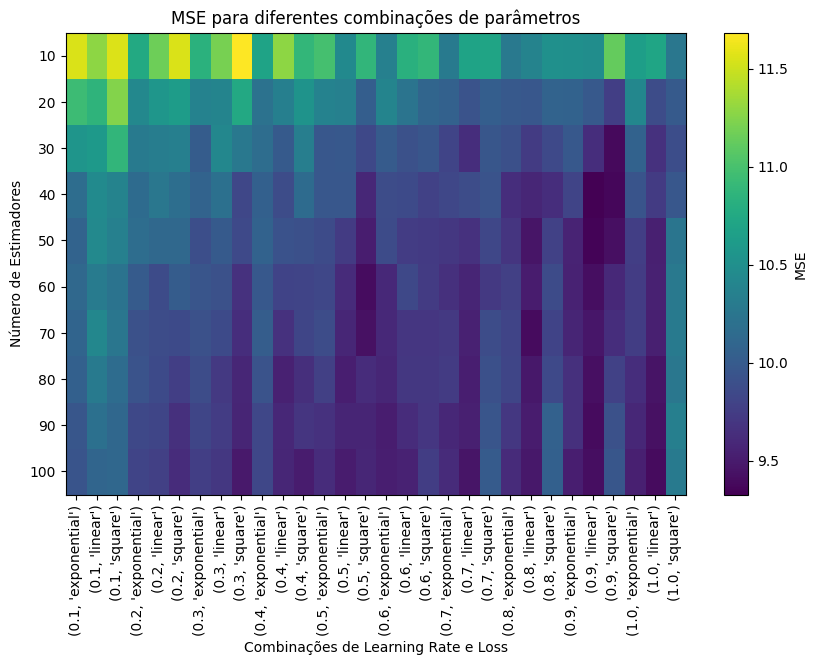

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from itertools import product  # Para gerar combinações

# Parâmetros para teste
estimadores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = ['linear', 'square', 'exponential']

# Armazenar resultados
results = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Testar todas as combinações
for n, lr, l in product(estimadores, learning_rates, losses):  # Produto cartesiano das combinações
    print(f"Testando: n_estimators={n}, learning_rate={lr}, loss={l}")
    fold_metrics = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo AdaBoost para Regressão
        model = AdaBoostRegressor(n_estimators=n, learning_rate=lr, loss=l, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)
    
    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio: {mean_mse:.4f}")
    results.append({'n_estimators': n, 'learning_rate': lr, 'loss': l, 'MSE': mean_mse})

# Transformar resultados em DataFrame para facilitar análise
results_df = pd.DataFrame(results)

# Encontrar a melhor combinação
best_row = results_df.loc[results_df['MSE'].idxmin()]
print("\nMelhor Configuração:")
print(best_row)

# Visualizar os resultados
pivot_table = results_df.pivot_table(values='MSE', index='n_estimators', columns=['learning_rate', 'loss'])
plt.figure(figsize=(10, 6))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='MSE')
plt.title('MSE para diferentes combinações de parâmetros')
plt.xlabel('Combinações de Learning Rate e Loss')
plt.ylabel('Número de Estimadores')
plt.xticks(range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), labels=pivot_table.index)
plt.show()


Testando: n_estimators=10, learning_rate=0.1, max_depth=2
MSE Médio: 25.0815
Testando: n_estimators=10, learning_rate=0.1, max_depth=3
MSE Médio: 20.3325
Testando: n_estimators=10, learning_rate=0.1, max_depth=4
MSE Médio: 18.0133
Testando: n_estimators=10, learning_rate=0.1, max_depth=5
MSE Médio: 16.4953
Testando: n_estimators=10, learning_rate=0.2, max_depth=2
MSE Médio: 12.0092
Testando: n_estimators=10, learning_rate=0.2, max_depth=3
MSE Médio: 8.9371
Testando: n_estimators=10, learning_rate=0.2, max_depth=4
MSE Médio: 7.1015
Testando: n_estimators=10, learning_rate=0.2, max_depth=5
MSE Médio: 6.1190
Testando: n_estimators=10, learning_rate=0.3, max_depth=2
MSE Médio: 9.2511
Testando: n_estimators=10, learning_rate=0.3, max_depth=3
MSE Médio: 6.6015
Testando: n_estimators=10, learning_rate=0.3, max_depth=4
MSE Médio: 5.4943
Testando: n_estimators=10, learning_rate=0.3, max_depth=5
MSE Médio: 4.6654
Testando: n_estimators=10, learning_rate=0.4, max_depth=2
MSE Médio: 8.9859
Testand

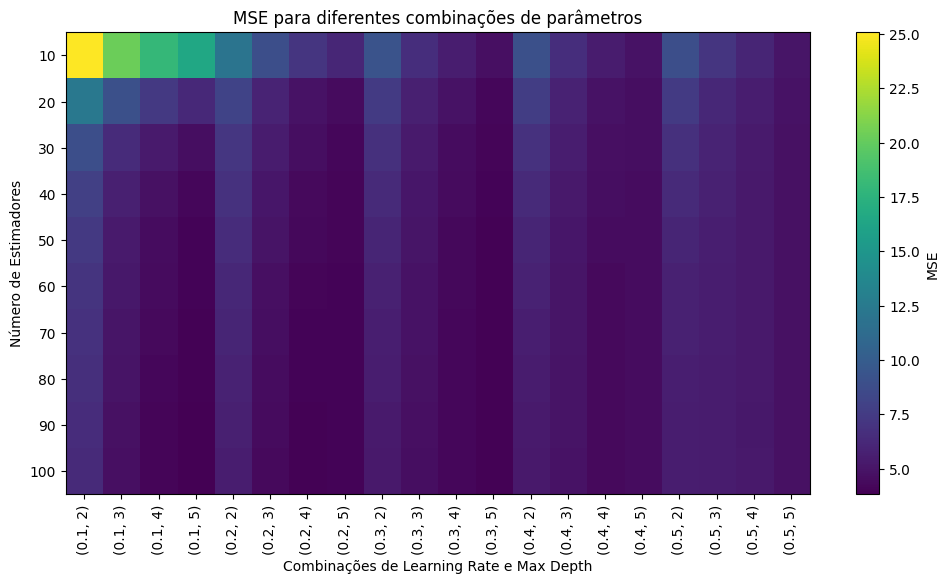

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from itertools import product

# Parâmetros para teste
estimadores = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
max_depths = [2, 3, 4, 5]

# Armazenar resultados
results = []

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Testar todas as combinações
for n, lr, md in product(estimadores, learning_rates, max_depths):  # Produto cartesiano das combinações
    print(f"Testando: n_estimators={n}, learning_rate={lr}, max_depth={md}")
    fold_metrics = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Modelo Gradient Boosting para Regressão
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, max_depth=md, random_state=42)
        model.fit(X_train_fold, y_train_fold)
        
        # Previsões na validação
        y_val_pred = model.predict(X_val_fold)
        
        # Métrica de erro (Mean Squared Error)
        fold_mse = mean_squared_error(y_val_fold, y_val_pred)
        fold_metrics.append(fold_mse)
    
    # Média do MSE nos folds
    mean_mse = np.mean(fold_metrics)
    print(f"MSE Médio: {mean_mse:.4f}")
    results.append({'n_estimators': n, 'learning_rate': lr, 'max_depth': md, 'MSE': mean_mse})

# Transformar resultados em DataFrame para facilitar análise
results_df = pd.DataFrame(results)

# Encontrar a melhor combinação
best_row = results_df.loc[results_df['MSE'].idxmin()]
print("\nMelhor Configuração:")
print(best_row)

# Visualizar os resultados
pivot_table = results_df.pivot_table(values='MSE', index='n_estimators', columns=['learning_rate', 'max_depth'])
plt.figure(figsize=(12, 6))
plt.imshow(pivot_table, cmap='viridis', aspect='auto', interpolation='nearest')
plt.colorbar(label='MSE')
plt.title('MSE para diferentes combinações de parâmetros')
plt.xlabel('Combinações de Learning Rate e Max Depth')
plt.ylabel('Número de Estimadores')
plt.xticks(range(len(pivot_table.columns)), labels=pivot_table.columns, rotation=90)
plt.yticks(range(len(pivot_table.index)), labels=pivot_table.index)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# K-Fold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Para armazenar as métricas de cada fold
fold_metrics = []

# Iterar pelos folds
for train_index, val_index in kf.split(X_train):
    # Divisão dos dados em treino e validação
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Escalando os dados com MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)  # Ajusta e transforma o conjunto de treino
    X_val_scaled = scaler.transform(X_val_fold)         # Transforma o conjunto de validação (sem ajustar novamente)
    
    # Modelo de Regressão Linear
    model = LinearRegression()
    model.fit(X_train_scaled, y_train_fold)
    
    # Previsões na validação
    y_val_pred = model.predict(X_val_scaled)
    
    # Métrica de erro
    fold_mse = mean_squared_error(y_val_fold, y_val_pred)
    fold_metrics.append(fold_mse)

# Média dos MSEs nos folds
mean_mse = np.mean(fold_metrics)
print(f"MSE Médio (Validação Cruzada): {mean_mse:.4f}")

# Ajustando nos dados de treino completos e testando no conjunto de teste
scaler = MinMaxScaler()
X_train_scaled_full = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo final
model = LinearRegression()
model.fit(X_train_scaled_full, y_train)

# Previsões no conjunto de teste
y_test_pred = model.predict(X_test_scaled)

# Métrica de erro no conjunto de teste
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE no Conjunto de Teste: {test_mse:.4f}")


MSE Médio (Validação Cruzada): 12.4988
MSE no Conjunto de Teste: 12.1873


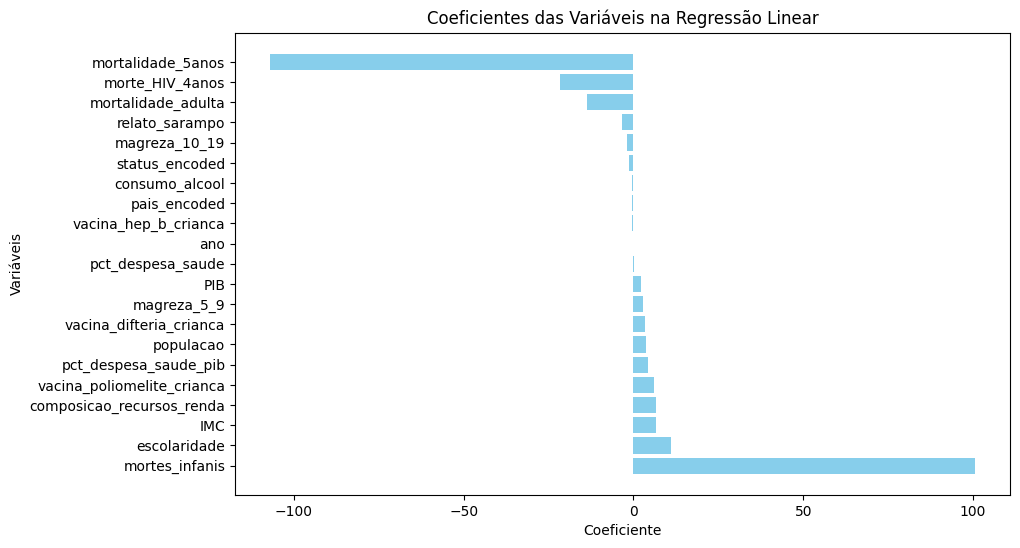

Intercepto: 52.59859413204701


In [ ]:
# Obtendo os coeficientes e intercepto
coef = model.coef_  # Coeficientes das variáveis
intercept = model.intercept_  # Intercepto (constante)

# Criando um DataFrame para os coeficientes com os nomes das variáveis
coef_df = pd.DataFrame(coef, index=X_train.columns, columns=['Coeficiente'])

# Ordenando os coeficientes por valor absoluto (para facilitar a visualização)
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Plotando os coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coeficiente'], color='skyblue')
plt.xlabel('Coeficiente')
plt.ylabel('Variáveis')
plt.title('Coeficientes das Variáveis na Regressão Linear')
plt.show()

# Exibindo também o intercepto
print(f"Intercepto: {intercept}")